### 3. Метрики в задаче регрессии

In [8]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Сгенерируем датасет y = 0.5x + 1 + eps, где eps ~ N(0, 0.2)

In [6]:
x = np.arange(-5, 5, 10.0 / 500)
eps = np.random.normal(0, 0.2, 500)
y = 0.5 * x + 1 + eps

#### Визуализируем

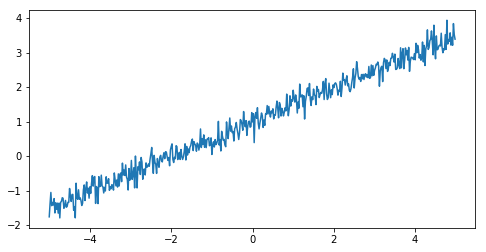

In [10]:
pyplot.figure(figsize(8,4))
pyplot.plot(x,y)

#### Восстановим y, считая, что y = kx + b

In [42]:
from scipy import optimize
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [40]:
pred = optimize.minimize(lambda arr: mean_squared_error(y, arr[0] + x * arr[1]), [0, 0])

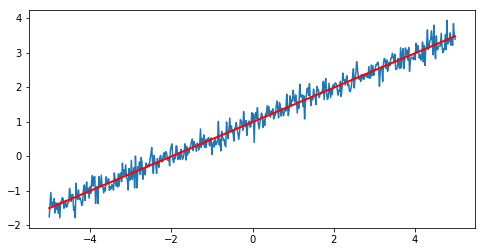

In [36]:
pyplot.plot(x,y)
pyplot.plot(x, pred.x[0] + pred.x[1]*x, linewidth=2, color = 'r')

#### Добавим 75 точек, для которых y = -1 + eps

In [37]:
eps = np.random.normal(0, 0.2, 75)
y1 = -1 + eps
x1 = np.arange(-4.5, 4.5, 9.0 / 75.0)
x = np.hstack((x1,x))
y = np.hstack((y1,y))

#### Минимизируем MSE и MAE

In [43]:
c1 = optimize.minimize(lambda arr: mean_squared_error(arr[0] + arr[1] * x, y), [0, 0])
c2 = optimize.minimize(lambda arr: mean_absolute_error(arr[0] + arr[1] * x, y), [0, 0])

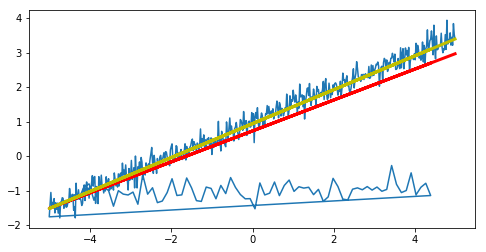

In [46]:
pyplot.plot(x, y)
pyplot.plot(x, c1.x[0] + c1.x[1]*x, linewidth = 3, color = 'r')
pyplot.plot(x, c2.x[0] + c2.x[1]*x, linewidth = 3, color = 'y')

#### Видно, что MAE более устойчив к выбросам, чем MSE